In [4]:
#Import Libraries
import pandas as pd
import io
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
pd.options.display.max_columns = None

In [6]:
#Path to files, manually unzipped
path = r'../box_downloads/Current Loans Full Files/Unzipped' 
all_files = glob.glob(path + "/*.csv")

li = []

fields = ['loan_number','amount_borrowed','borrower_rate','prosper_rating','term','age_in_months'
          ,'origination_date','days_past_due','principal_balance','service_fees_paid','principal_paid'
          ,'interest_paid','prosper_fees_paid','late_fees_paid','debt_sale_proceeds_received','loan_status'
          ,'loan_status_description','loan_default_reason','loan_default_reason_description']

In [7]:
#Pull in all of the files
for filename in all_files:
    df_loans = pd.read_csv(filename, index_col=None, header=0, usecols=fields)
    li.append(df_loans)

In [8]:
df_loans = pd.concat(li, axis=0, ignore_index=True)

In [9]:
df_loans.head()

,loan_number,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_status_description,loan_default_reason,loan_default_reason_description
0,9422,1800.0,0.1930,NaN,36,167,2007-03-28 00:00:00,0,0.0,-28.27,1801.49,614.54,30.0,25.76,0.00,4,COMPLETED,NaN,NaN
1,9423,10000.0,0.1990,NaN,36,167,2007-03-28 00:00:00,0,0.0,-160.20,10000.00,3187.96,75.0,19.07,0.00,4,COMPLETED,NaN,NaN
2,9424,2000.0,0.1500,NaN,36,167,2007-03-28 00:00:00,0,0.0,-33.28,2000.00,499.16,0.0,0.00,0.00,4,COMPLETED,NaN,NaN
3,9425,4800.0,0.1248,E,36,167,2007-03-29 00:00:00,0,0.0,-74.19,4800.00,925.92,0.0,0.00,0.00,4,COMPLETED,NaN,NaN
4,9439,15000.0,0.2400,NaN,36,167,2007-03-29 00:00:00,123,0.0,-24.84,576.35,596.11,0.0,0.00,1248.99,3,DEFAULTED,7.0,DebtSold


In [10]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329028 entries, 0 to 1329027
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   loan_number                      1329028 non-null  int64  
 1   amount_borrowed                  1329028 non-null  float64
 2   borrower_rate                    1329028 non-null  float64
 3   prosper_rating                   1313746 non-null  object 
 4   term                             1329028 non-null  int64  
 5   age_in_months                    1329028 non-null  int64  
 6   origination_date                 1329028 non-null  object 
 7   days_past_due                    1329028 non-null  int64  
 8   principal_balance                1329028 non-null  float64
 9   service_fees_paid                1329028 non-null  float64
 10  principal_paid                   1329028 non-null  float64
 11  interest_paid                    1329028 non-null 

In [11]:
df_loans.describe()

,loan_number,amount_borrowed,borrower_rate,term,age_in_months,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_default_reason
count,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,1.329028e+06,125925.000000
mean,7.365843e+05,1.303541e+04,1.536433e-01,4.295059e+01,5.137407e+01,6.462579e+01,2.656771e+03,-1.742413e+02,9.722240e+03,2.433006e+03,3.456056e+00,7.950287e+00,7.500697e-01,3.102797e+00,5.718444
std,4.210361e+05,8.112448e+03,6.676490e-02,1.095000e+01,2.951123e+01,3.286283e+02,5.407358e+03,1.574122e+02,7.945446e+03,2.372011e+03,1.452832e+01,4.421400e+01,7.835131e+01,1.257495e+00,2.049502
min,1.000000e+00,1.000000e+03,0.000000e+00,1.200000e+01,2.000000e+00,0.000000e+00,0.000000e+00,-1.917100e+03,0.000000e+00,-8.255100e+00,0.000000e+00,-1.000000e-02,0.000000e+00,1.000000e+00,1.000000
25%,3.688958e+05,7.000000e+03,1.034000e-01,3.600000e+01,3.100000e+01,0.000000e+00,0.000000e+00,-2.418600e+02,3.500000e+03,8.105700e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000
50%,7.419005e+05,1.100000e+04,1.375000e-01,3.600000e+01,4.800000e+01,0.000000e+00,0.000000e+00,-1.306400e+02,7.972015e+03,1.702410e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.000000
75%,1.094019e+06,1.800000e+04,1.924000e-01,6.000000e+01,6.700000e+01,0.000000e+00,2.905792e+03,-6.071000e+01,1.500000e+04,3.259123e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.000000
max,1.505745e+06,4.000000e+04,4.975000e-01,6.000000e+01,1.830000e+02,4.947000e+03,4.000000e+04,3.206000e+01,4.000000e+04,2.499148e+04,8.700000e+02,1.738870e+03,2.500000e+04,6.000000e+00,7.000000


# Join Additional Data Sources

Join 2 additional data sources:
1. Master file from Dedupe_Full_File_Dask.ipynb, which contains mapping from loan_number to listing, as well as several fields missing or blank in Listing files
2. List of Listing files, which contain data about listings

In [12]:
#First, bring in the mapping file
fields = ['LoanID','ListingNumber','ListingCategoryName','FICORange','ScorexRange']
df_map = pd.read_csv('dask_df_dropped_cols_v3.csv', usecols=fields)

In [13]:
df_map.head()

,LoanID,ListingNumber,ListingCategoryName,FICORange,ScorexRange
0,256748,2187631,Other,720-739,680-699
1,256812,2253012,Debt Consolidation,800-819,820-839
2,257165,2280474,Other,760-779,800-819
3,257440,2273313,Home Improvement,780-799,800-819
4,257515,2193175,Debt Consolidation,720-739,700-719


In [14]:
df_merge = pd.merge(df_loans,df_map,left_on='loan_number',right_on='LoanID',how='inner')
#Source: https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/

In [15]:
df_merge

,loan_number,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_status_description,loan_default_reason,loan_default_reason_description,LoanID,ListingNumber,ListingCategoryName,FICORange,ScorexRange
0,9422,1800.0,0.1930,NaN,36,167,2007-03-28 00:00:00,0,0.00,-28.27,1801.49,614.54,30.0,25.76,0.00,4,COMPLETED,NaN,NaN,9422,113183,Not Available,NaN,580-599
1,9423,10000.0,0.1990,NaN,36,167,2007-03-28 00:00:00,0,0.00,-160.20,10000.00,3187.96,75.0,19.07,0.00,4,COMPLETED,NaN,NaN,9423,108174,Not Available,NaN,600-619
2,9424,2000.0,0.1500,NaN,36,167,2007-03-28 00:00:00,0,0.00,-33.28,2000.00,499.16,0.0,0.00,0.00,4,COMPLETED,NaN,NaN,9424,112183,Not Available,NaN,620-639
3,9425,4800.0,0.1248,E,36,167,2007-03-29 00:00:00,0,0.00,-74.19,4800.00,925.92,0.0,0.00,0.00,4,COMPLETED,NaN,NaN,9425,113605,Not Available,NaN,640-659
4,9439,15000.0,0.2400,NaN,36,167,2007-03-29 00:00:00,123,0.00,-24.84,576.35,596.11,0.0,0.00,1248.99,3,DEFAULTED,7.0,DebtSold,9439,111634,Not Available,NaN,620-639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328983,1495966,8000.0,0.1249,A,36,2,2020-12-31 00:00:00,0,7817.27,0.00,0.00,0.00,0.0,0.00,0.00,1,CURRENT,NaN,NaN,1495966,11716460,Debt Consolidation,700-719,NaN
1328984,1505355,2000.0,0.1074,A,36,2,2020-12-31 00:00:00,0,1953.01,0.00,0.00,0.00,0.0,0.00,0.00,1,CURRENT,NaN,NaN,1505355,11747912,Medical / Dental,700-719,NaN
1328985,1491017,30000.0,0.0924,AA,36,2,2020-12-29 00:00:00,0,29278.08,0.00,0.00,0.00,0.0,0.00,0.00,1,CURRENT,NaN,NaN,1491017,11947620,Home Improvement,720-739,NaN
1328986,1494592,12000.0,0.1024,A,36,2,2020-12-29 00:00:00,0,11715.80,0.00,0.00,0.00,0.0,0.00,0.00,1,CURRENT,NaN,NaN,1494592,11949912,Debt Consolidation,720-739,NaN


In [16]:
#Remove unneeded columns from mapping file
df_merge = df_merge.drop(columns=['LoanID'])

In [17]:
#Next, bring in the listings file

df_list = pd.read_csv('Listings_Slim.csv', encoding='latin-1',)

C:\Users\P2773714\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18,19,25,48,55,73,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df_list.head()

,Unnamed: 0,listing_number,listing_status,listing_status_reason,verification_stage,listing_amount,amount_funded,amount_remaining,percent_funded,partial_funding_indicator,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,scorex,scorex_change,fico_score,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,income_verifiable,dti_wprosper_loan,employment_status_description,occupation,months_employed,borrower_state,borrower_city,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,group_indicator,group_name,amount_participation,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,first_recorded_credit_line,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,oldest_trade_open_date,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,is_homeowner,investment_typeid,investment_type_description
0,24,5050,6,Completed,NaN,18000.0,18000.0,0.0,1.0,False,1.0,NaN,NaN,0.1050,-0.2750,0.12198,593.57,NaN,NaN,NaN,NaN,0,0,Not displayed,19166.6667,True,0.19166,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,NaN,0,3080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Fractional
1,92,5163,6,Completed,NaN,2000.0,2000.0,0.0,1.0,False,1.0,NaN,NaN,0.1075,-0.2725,0.12123,65.71,NaN,NaN,NaN,NaN,0,0,Not displayed,13750.0000,True,0.06558,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,"ALL DOCTORS MD,DO,OD,DDS,DMD,PhD,DVM,DPM,DC,...",0,836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Fractional
2,132,5654,6,Completed,NaN,3500.0,3500.0,0.0,1.0,False,1.0,NaN,NaN,0.2070,-0.1730,0.24451,136.76,NaN,NaN,NaN,NaN,0,0,Not displayed,2666.6667,True,0.07003,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,Vets helping Vets,0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Fractional
3,521,4603,6,Completed,NaN,10000.0,10000.0,0.0,1.0,False,1.0,NaN,NaN,0.1425,-0.2375,0.15713,346.65,NaN,NaN,NaN,NaN,0,0,Not displayed,8333.3333,True,0.25400,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,Business Owners Cooperative,0,1770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Fractional
4,527,4606,6,Completed,NaN,1000.0,1000.0,0.0,1.0,False,1.0,NaN,NaN,0.0665,-0.3135,0.08870,30.95,NaN,NaN,NaN,NaN,0,0,Not displayed,8333.3333,True,0.00611,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,NaN,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Fractional


In [19]:
#Join Listings file with Master dataframe
df_merge_total = pd.merge(df_merge,df_list.drop_duplicates('listing_number'),left_on='ListingNumber',right_on='listing_number',how='left')

In [20]:
df_merge_total.head()

,loan_number,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_status_description,loan_default_reason,loan_default_reason_description,ListingNumber,ListingCategoryName,FICORange,ScorexRange,Unnamed: 0,listing_number,listing_status,listing_status_reason,verification_stage,listing_amount,amount_funded,amount_remaining,percent_funded,partial_funding_indicator,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,scorex,scorex_change,fico_score,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,income_verifiable,dti_wprosper_loan,employment_status_description,occupation,months_employed,borrower_state,borrower_city,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,group_indicator,group_name,amount_participation,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,first_recorded_credit_line,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,oldest_trade_open_date,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,is_homeowner,investment_typeid,investment_type_description
0,9422,1800.0,0.1930,NaN,36,167,2007-03-28 00:00:00,0,0.0,-28.27,1801.49,614.54,30.0,25.76,0.00,4,COMPLETED,NaN,NaN,113183,Not Available,NaN,580-599,390188.0,113183.0,6.0,Completed,NaN,1800.0,1800.0,0.0,1.0,False,1.0,-0.5770,0.380,0.1830,-0.1970,0.21783,67.17,< 600,NaN,NaN,1.0,0.0,4.0,"$50,000-74,999",4416.6667,True,0.20,Full-time,Tradesman - Carpenter,47.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,Big Money Loans,0.0,811.0,3.0,0.0,1.0,0.0,1998-02-20 00:00:00,16.0,6.0,274.0,6.0,6.0,1.18,3.0,29951.0,0.0,1760.0,0.0,0.0,21.0,16.0,12.0,3.0,1.0,2.202e+06,2.0,0.0,0.0,False,1.0,Fractional
1,9423,10000.0,0.1990,NaN,36,167,2007-03-28 00:00:00,0,0.0,-160.20,10000.00,3187.96,75.0,19.07,0.00,4,COMPLETED,NaN,NaN,108174,Not Available,NaN,600-619,390458.0,108174.0,6.0,Completed,NaN,10000.0,10000.0,0.0,1.0,False,1.0,-0.5710,0.380,0.1890,-0.1910,0.22643,381.39,600-619,NaN,NaN,1.0,0.0,4.0,"$50,000-74,999",2875.0000,True,0.23,Full-time,Other,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,AIDS/HIV Research,0.0,765.0,0.0,43.0,0.0,0.0,1990-04-07 00:00:00,35.0,6.0,0.0,6.0,5.0,0.49,5.0,28013.0,127156.0,436.0,1310.0,90.0,16.0,35.0,15.0,0.0,20.0,4.07199e+06,48.0,28.0,43.0,True,1.0,Fractional
2,9424,2000.0,0.1500,NaN,36,167,2007-03-28 00:00:00,0,0.0,-33.28,2000.00,499.16,0.0,0.00,0.00,4,COMPLETED,NaN,NaN,112183,Not Available,NaN,620-639,351045.0,112183.0,6.0,Completed,NaN,2000.0,2000.0,0.0,1.0,False,1.0,-0.1300,0.135,0.1400,0.0050,0.16395,69.82,620-639,NaN,NaN,7.0,0.0,7.0,Not employed,480.0000,True,0.27,Not employed,Student - College Freshman,7.0,CO,Denver,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,Lend2's Group,0.0,62.0,0.0,0.0,0.0,0.0,2005-03-30 00:00:00,5.0,1.0,0.0,4.0,4.0,0.57,4.0,2625.0,0.0,1867.0,0.0,39.0,1.0,5.0,5.0,0.0,0.0,3.30200e+06,0.0,0.0,0.0,False,1.0,Fractional
3,9425,4800.0,0.1248,E,36,167,2007-03-29 

# Clean Data

In [21]:
df_merge_total.groupby(['loan_status','loan_status_description']).size().reset_index().rename(columns={0:'count'})

,loan_status,loan_status_description,count
0,1,CURRENT,293335
1,2,CHARGEOFF,97376
2,3,DEFAULTED,125726
3,4,COMPLETED,808528
4,6,CANCELLED,4023


In [22]:
counts = df_merge_total.loan_status_description.value_counts()
print(counts)

COMPLETED    808528
CURRENT      293335
DEFAULTED    125726
CHARGEOFF     97376
CANCELLED      4023
Name: loan_status_description, dtype: int64


Text(0.5, 0, 'Loan Status')

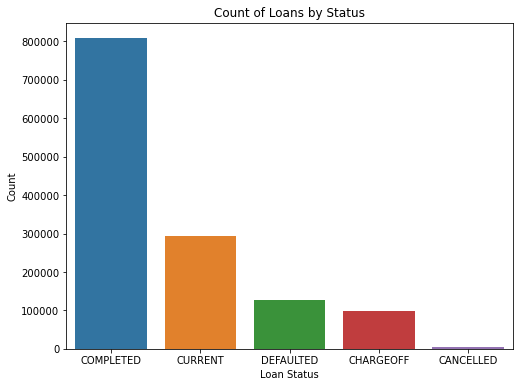

In [23]:
#Bar plot of Incomplete vs Completed

counts = df_merge_total.loan_status_description.value_counts()
Completed = counts['COMPLETED']
Incomplete = counts['DEFAULTED']
Chargeoff = counts['CHARGEOFF']
Cancelled = counts['CANCELLED']



plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Loans by Status')
plt.ylabel('Count')
plt.xlabel('Loan Status')

In [24]:
#Remove Current and Cancelled loans
df_master = df_merge_total[df_merge_total.loan_status_description != 'CURRENT'] 
df_master = df_master[df_merge_total.loan_status_description != 'CANCELLED']

<ipython-input-24-2025db12b848>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_master = df_master[df_merge_total.loan_status_description != 'CANCELLED']


In [25]:
df_master.head()

,loan_number,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_status_description,loan_default_reason,loan_default_reason_description,ListingNumber,ListingCategoryName,FICORange,ScorexRange,Unnamed: 0,listing_number,listing_status,listing_status_reason,verification_stage,listing_amount,amount_funded,amount_remaining,percent_funded,partial_funding_indicator,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,scorex,scorex_change,fico_score,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,income_verifiable,dti_wprosper_loan,employment_status_description,occupation,months_employed,borrower_state,borrower_city,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,group_indicator,group_name,amount_participation,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,first_recorded_credit_line,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,oldest_trade_open_date,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,is_homeowner,investment_typeid,investment_type_description
0,9422,1800.0,0.1930,NaN,36,167,2007-03-28 00:00:00,0,0.0,-28.27,1801.49,614.54,30.0,25.76,0.00,4,COMPLETED,NaN,NaN,113183,Not Available,NaN,580-599,390188.0,113183.0,6.0,Completed,NaN,1800.0,1800.0,0.0,1.0,False,1.0,-0.5770,0.380,0.1830,-0.1970,0.21783,67.17,< 600,NaN,NaN,1.0,0.0,4.0,"$50,000-74,999",4416.6667,True,0.20,Full-time,Tradesman - Carpenter,47.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,Big Money Loans,0.0,811.0,3.0,0.0,1.0,0.0,1998-02-20 00:00:00,16.0,6.0,274.0,6.0,6.0,1.18,3.0,29951.0,0.0,1760.0,0.0,0.0,21.0,16.0,12.0,3.0,1.0,2.202e+06,2.0,0.0,0.0,False,1.0,Fractional
1,9423,10000.0,0.1990,NaN,36,167,2007-03-28 00:00:00,0,0.0,-160.20,10000.00,3187.96,75.0,19.07,0.00,4,COMPLETED,NaN,NaN,108174,Not Available,NaN,600-619,390458.0,108174.0,6.0,Completed,NaN,10000.0,10000.0,0.0,1.0,False,1.0,-0.5710,0.380,0.1890,-0.1910,0.22643,381.39,600-619,NaN,NaN,1.0,0.0,4.0,"$50,000-74,999",2875.0000,True,0.23,Full-time,Other,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,AIDS/HIV Research,0.0,765.0,0.0,43.0,0.0,0.0,1990-04-07 00:00:00,35.0,6.0,0.0,6.0,5.0,0.49,5.0,28013.0,127156.0,436.0,1310.0,90.0,16.0,35.0,15.0,0.0,20.0,4.07199e+06,48.0,28.0,43.0,True,1.0,Fractional
2,9424,2000.0,0.1500,NaN,36,167,2007-03-28 00:00:00,0,0.0,-33.28,2000.00,499.16,0.0,0.00,0.00,4,COMPLETED,NaN,NaN,112183,Not Available,NaN,620-639,351045.0,112183.0,6.0,Completed,NaN,2000.0,2000.0,0.0,1.0,False,1.0,-0.1300,0.135,0.1400,0.0050,0.16395,69.82,620-639,NaN,NaN,7.0,0.0,7.0,Not employed,480.0000,True,0.27,Not employed,Student - College Freshman,7.0,CO,Denver,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True,Lend2's Group,0.0,62.0,0.0,0.0,0.0,0.0,2005-03-30 00:00:00,5.0,1.0,0.0,4.0,4.0,0.57,4.0,2625.0,0.0,1867.0,0.0,39.0,1.0,5.0,5.0,0.0,0.0,3.30200e+06,0.0,0.0,0.0,False,1.0,Fractional
3,9425,4800.0,0.1248,E,36,167,2007-03-29 

In [26]:
#Combined Charge Offs and Defaults into one Value
df_master['Default_Flag'] = 0

In [27]:
df_master.loc[((df_master['loan_status'] == 2) | (df_master['loan_status'] == 3)  ) , 'Default_Flag'] = 1

In [28]:
#Add Completed Flag for Visualizations
df_master['Completed_Flag'] = 0

In [29]:
df_master.loc[(df_master['loan_status'] == 4) , 'Completed_Flag'] = 1

In [30]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031630 entries, 0 to 1328959
Columns: 105 entries, loan_number to Completed_Flag
dtypes: float64(73), int64(8), object(24)
memory usage: 834.3+ MB


In [31]:
df_master.describe()

,loan_number,amount_borrowed,borrower_rate,term,age_in_months,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,loan_status,loan_default_reason,ListingNumber,Unnamed: 0,listing_number,listing_status,verification_stage,listing_amount,amount_funded,amount_remaining,percent_funded,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,prosper_score,listing_category_id,income_range,stated_monthly_income,dti_wprosper_loan,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,amount_participation,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,investment_typeid,Default_Flag,Completed_Flag
count,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,1.031630e+06,125777.000000,1.031630e+06,1.031083e+06,1.031083e+06,1031083.0,0.0,1.031083e+06,1.031083e+06,1.031083e+06,1.031083e+06,1.031064e+06,1.023495e+06,1.023495e+06,1.031083e+06,1.031083e+06,1.031058e+06,1.031083e+06,1.017779e+06,1.031083e+06,1.031083e+06,1.031083e+06,1.031083e+06,1.021881e+06,1.031083e+06,1.031083e+06,217234.000000,217234.000000,217234.000000,217234.000000,217234.000000,217234.000000,217234.000000,217006.00000,217006.000000,95665.000000,1062.000000,400.000000,1.031083e+06,1031083.0,685219.000000,684614.000000,684315.000000,684614.000000,677680.000000,684614.000000,684614.000000,6.776570e+05,677680.000000,677680.000000,677680.000000,684147.000000,6.649620e+05,5.629650e+05,6.840930e+05,562965.000000,684093.000000,684110.000000,684110.000000,684110.000000,684110.000000,684110.000000,684110.000000,684110.000000,684110.000000,1.031083e+06,1.031630e+06,1.031630e+06
mean,5.962234e+05,1.277455e+04,1.564579e-01,4.219392e+01,5.998104e+01,8.280305e+01,1.046082e+03,-1.687243e+02,1.089411e+04,2.390843e+03,3.724322e+00,8.770543e+00,9.390611e-01,3.689348e+00,5.721436,4.753691e+06,1.096507e+06,4.750830e+06,6.0,NaN,1.277883e+04,1.277397e+04,4.862141e+00,9.996882e-01,7.278040e-01,6.871318e-02,6.947171e-02,1.465167e-01,1.350582e-01,1.866803e-01,3.971412e+02,6.858735e+00,2.595414e+00,4.224545e+00,6.657521e+03,2.473055e+04,1.099711e+02,1.602102e-01,3.177678e-01,18615.554598,6675.539337,2321.652443,11.101306,10.299603,0.361578,0.064424,12933.40927,11373.506223,13.248210,1.063089,1.055000,2.424053e-02,0.0,1079.034199,0.347483,3.713664,0.292952,0.006251,25.961532,1.135088,8.178309e+02,11.071909,10.285726,0.547981,8.169405,2.995822e+04,1.282766e+05,1.985183e+04,976.637242,50.754414,5.171524,25.961955,23.539934,0.345886,2.074719,3.346433,1.553639,3.712700,2.534938e+00,2.162616e-01,7.837384e-01
std,3.586145e+05,7.981173e+03,6.826531e-02,1.058734e+01,2.730850e+01,3.709586e+02,3.614857e+03,1.514488e+02,8.178534e+03,2.296069e+03,1.494592e+01,4.586778e+01,8.849624e+01,6.347666e-01,2.048746,2.772190e+06,4.659119e+05,2.770129e+06,0.0,NaN,7.983359e+03,7.980771e+03,1.545718e+02,8.677158e-03,8.699508e-02,5.229751e-0

In [32]:
counts = df_master.Default_Flag.value_counts()
print(counts)

0    808528
1    223102
Name: Default_Flag, dtype: int64


In [33]:
df_analysis = df_master

In [34]:
#Convert fields from Boolean to int
df_analysis['group_indicator'] = (df_analysis['group_indicator'] == 'TRUE').astype(int)

In [35]:
df_analysis['is_homeowner'] = (df_analysis['is_homeowner'] == 'TRUE').astype(int)
                                      

In [36]:
df_analysis['partial_funding_indicator'] = (df_analysis['partial_funding_indicator'] == 'TRUE').astype(int)

In [37]:
df_analysis['income_verifiable'] = (df_analysis['income_verifiable'] == 'TRUE').astype(int)

In [38]:
df_analysis['investment_type_description']

0          Fractional
1          Fractional
2          Fractional
3          Fractional
4          Fractional
              ...    
1328919         Whole
1328928         Whole
1328947         Whole
1328949         Whole
1328959    Fractional
Name: investment_type_description, Length: 1031630, dtype: object

In [39]:
#Drop values with missing ratings or scores
df_analysis = df_analysis[df_analysis['prosper_score'].notna()]
df_analysis = df_analysis[df_analysis['prosper_rating'].notna()]

In [40]:
#Drop unecessary columns. Moved from primary Analysis script to save processing power
df_analysis = df_analysis.drop(columns=['investment_typeid','group_indicator','amount_participation','is_homeowner','income_verifiable','amount_funded','verification_stage','group_name','scorex_change','loan_status','loan_status_description','loan_default_reason','loan_default_reason_description','oldest_trade_open_date','partial_funding_indicator','loan_number','ListingNumber','listing_number','Unnamed: 0','listing_status','listing_status_reason'])

In [41]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010093 entries, 3 to 1328959
Data columns (total 84 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   amount_borrowed                                   1010093 non-null  float64
 1   borrower_rate                                     1010093 non-null  float64
 2   prosper_rating                                    1010093 non-null  object 
 3   term                                              1010093 non-null  int64  
 4   age_in_months                                     1010093 non-null  int64  
 5   origination_date                                  1010093 non-null  object 
 6   days_past_due                                     1010093 non-null  int64  
 7   principal_balance                                 1010093 non-null  float64
 8   service_fees_paid                                 1010093 non-null  floa

# Output for Analysis

In [42]:
#Export file for faster processing
cols=[]
df_analysis.to_csv('df_master.csv',index=False)#, columns=cols)